<a href="https://colab.research.google.com/github/Alyssa-April/Data-Science-Projects/blob/main/Global_Cost_of_Living_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Cost of Living Dataset Exploration

More information on the analysis carried out can be found in the pdf report prepared.

The data can be obtained from [kaggle](https://www.kaggle.com/datasets/mvieira101/global-cost-of-living).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load the dataset into a variable called data
data = pd.read_csv('/content/drive/MyDrive/Data_Science/cost-of-living_v2.csv')
data

# Notice that there are 4956 observations of data with 58 columns.

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,103.14,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


#### Heading before Removal of Variables

In [6]:
# Find the heading and list the number of columns/variables.
# 58 variables tally with the data frame printed above.

print(list(data.columns))

print('\n' + str(len(list(data.columns))))

['city', 'country', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'data_quality']

58


This dataset provides information on the cost of living in 4956 cities all around the world. The headings printed out above represent variables present in the dataset. From the list of variables, we can see 'city' and 'country' as categorical variables, providing the names of cities and countries for 4956 observations. 
However, the variables 'x1' through 'x55' are given in code names as to not make the data too messy looking. 

Later on, I will filter the data to only include columns/variables that I wish to analyse, to get more in depth details on particular areas. Therefore, I will rename these variables to enable clarity.
The last column called 'data quality' is a binary categorical data, where for value 0, it is considered that more contributors are needed to increase data quality, else 1. Only data with data quality value of 1 will be utilsed in this analysis.

#### Missing Values before Removal of Variables

In [7]:
# Missing values

data.isnull().sum()

# This shows the number of missing values for each column/variable.
# Observe that the dataset contains a lot of missing values. 
# We will check for missing values once again later on after filtering according to data quality and selected variables.

city               0
country            0
x1               428
x2               451
x3               334
x4               496
x5               440
x6               344
x7               445
x8               316
x9               378
x10              413
x11              343
x12              507
x13              478
x14              558
x15              566
x16              372
x17              381
x18              441
x19              469
x20              437
x21              433
x22              501
x23              388
x24              462
x25              721
x26              655
x27              490
x28             1506
x29             2166
x30              873
x31             1022
x32             1396
x33              588
x34             1058
x35              995
x36              488
x37             1201
x38              349
x39             1375
x40             2400
x41              475
x42             1132
x43             1681
x44              479
x45              617
x46          

#### Sort Columns before Removal of Variables

In [8]:
# Sort the columns.
# However, due to the code names, this might not be what we want. 
# We will sort the columns in the dataframe after filtering for the data we desire.

sorted(data.columns)

['city',
 'country',
 'data_quality',
 'x1',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x2',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x3',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x4',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x5',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x6',
 'x7',
 'x8',
 'x9']

#### Filter According to Data Quality

In [9]:
# Now, I will only use data where the data quality is 1 since it has better quality.

data.columns

Index(['city', 'country', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'data_quality'],
      dtype='object')

In [10]:
data = data[data['data_quality'] == 1]

data.shape

# This newly filtered data with only good quality data has 923 observations. 

(923, 58)

#### Filter the Desired Variables to be Analysed

In [11]:
# Now, I will select only the columns that I want to include in my analysis.
# Next, I will rename the columns to enable clarity.

data = data[['country', 'x3', 'x33', 'x36', 'x38', 'x39', 'x41', 'x43', 'x50', 'x51', 'x54', 'x55']]

data.rename(columns = {'x3': 'mcd_meal', 'x33': 'gasoline', 'x36': 'utilities', 'x38': 'internet', 
                       'x39': 'fitnessclub', 'x41': 'cinema', 'x43': 'school', 'x50': 'aprtmnt_city_centre', 
                       'x51': 'aprtmnt_out_centre', 'x54': 'salary', 'x55': 'mortgage_IR'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
# The dataset after data quality filtering and selection of variables

data

,country,mcd_meal,gasoline,utilities,internet,fitnessclub,cinema,school,aprtmnt_city_centre,aprtmnt_out_centre,salary,mortgage_IR
0,South Korea,6.15,1.43,182.13,22.48,55.88,9.60,17902.55,2669.12,1731.08,2689.62,3.47
1,China,5.69,1.20,66.00,17.07,63.49,8.54,26379.45,2952.70,1561.59,1419.87,5.03
2,China,4.98,1.19,59.65,16.66,34.17,8.54,24556.21,1242.24,688.05,1211.68,5.19
3,India,3.68,1.35,43.57,9.33,25.37,4.30,3682.67,1411.12,699.80,640.81,7.96
4,India,4.30,1.24,58.07,7.95,21.20,4.91,1964.24,601.02,329.15,586.46,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...
4205,Norway,12.33,2.09,178.99,59.71,44.39,13.36,2784.55,1335.73,1104.54,3383.13,2.57
4322,Portugal,7.38,2.41,101.86,42.15,56.48,6.33,8008.46,1650.87,1219.15,923.29,3.33
4404,Brazil,5.75,1.30,66.94,21.05,25.87,5.75,5577.65,557.54,457.43,395.29,8.17
4491,United States,10.00,1.24,205.35,73.57,58.00,15.00,16666.67,3560.00,2825.00,6117.78,4.90


#### Dataset Headings

In [13]:
# Find the heading and list the number of columns/variables.
# 12 variables tally with the data frame printed above.

print(list(data.columns))

print('\n' + str(len(list(data.columns))))

['country', 'mcd_meal', 'gasoline', 'utilities', 'internet', 'fitnessclub', 'cinema', 'school', 'aprtmnt_city_centre', 'aprtmnt_out_centre', 'salary', 'mortgage_IR']

12


After all the filtering, we end up with 923 observations and 12 columns/variables. 
The 'country' column is the only categorical variable in this data. It represents the names of countries for which their cost of living information across different areas are extracted.
The following columns are numerical variables that display the cost of certain living expenses such as fast food, gas, basic everyday utilities, internet subscription, fitness club membership fees, movie ticket prices, education fees, renting fees and mortgage interest rates.
The 'salary' column however, is the average monthly net salary after taxes. 
All the numerical values are in USD to enable comparison.
More info on the dataset and variables can be obtained through the report. 

#### Dataset Missing Values

In [14]:
# Missing values

data.isnull().sum()

country                 0
mcd_meal                0
gasoline                0
utilities               0
internet                0
fitnessclub             0
cinema                  1
school                 75
aprtmnt_city_centre     0
aprtmnt_out_centre      0
salary                  1
mortgage_IR            13
dtype: int64

This shows the number of missing values for each column/variable. Observe that the cinema column has one missing value, the school column has 75, the salary column has 1 and the mortgage_IR column has 13. The missing values will be dropped from the dataset.

In [15]:
# drop missing values

data = data.dropna()
data

,country,mcd_meal,gasoline,utilities,internet,fitnessclub,cinema,school,aprtmnt_city_centre,aprtmnt_out_centre,salary,mortgage_IR
0,South Korea,6.15,1.43,182.13,22.48,55.88,9.60,17902.55,2669.12,1731.08,2689.62,3.47
1,China,5.69,1.20,66.00,17.07,63.49,8.54,26379.45,2952.70,1561.59,1419.87,5.03
2,China,4.98,1.19,59.65,16.66,34.17,8.54,24556.21,1242.24,688.05,1211.68,5.19
3,India,3.68,1.35,43.57,9.33,25.37,4.30,3682.67,1411.12,699.80,640.81,7.96
4,India,4.30,1.24,58.07,7.95,21.20,4.91,1964.24,601.02,329.15,586.46,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...
4205,Norway,12.33,2.09,178.99,59.71,44.39,13.36,2784.55,1335.73,1104.54,3383.13,2.57
4322,Portugal,7.38,2.41,101.86,42.15,56.48,6.33,8008.46,1650.87,1219.15,923.29,3.33
4404,Brazil,5.75,1.30,66.94,21.05,25.87,5.75,5577.65,557.54,457.43,395.29,8.17
4491,United States,10.00,1.24,205.35,73.57,58.00,15.00,16666.67,3560.00,2825.00,6117.78,4.90


In [16]:
# Missing values

data.isnull().sum()

country                0
mcd_meal               0
gasoline               0
utilities              0
internet               0
fitnessclub            0
cinema                 0
school                 0
aprtmnt_city_centre    0
aprtmnt_out_centre     0
salary                 0
mortgage_IR            0
dtype: int64

In [17]:
print(data.shape)

(836, 12)


Now, there are no more missing values. We are left with 836 observations over 12 variables.

#### Sort Final Dataset in Ascending Alphabetical Order

In [18]:
# sort the columns in the data frame according to the ascending alphebetical order

data = data.reindex(sorted(data.columns), axis=1)
data

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,country,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
0,2669.12,1731.08,9.60,South Korea,55.88,1.43,22.48,6.15,3.47,2689.62,17902.55,182.13
1,2952.70,1561.59,8.54,China,63.49,1.20,17.07,5.69,5.03,1419.87,26379.45,66.00
2,1242.24,688.05,8.54,China,34.17,1.19,16.66,4.98,5.19,1211.68,24556.21,59.65
3,1411.12,699.80,4.30,India,25.37,1.35,9.33,3.68,7.96,640.81,3682.67,43.57
4,601.02,329.15,4.91,India,21.20,1.24,7.95,4.30,8.06,586.46,1964.24,58.07
...,...,...,...,...,...,...,...,...,...,...,...,...
4205,1335.73,1104.54,13.36,Norway,44.39,2.09,59.71,12.33,2.57,3383.13,2784.55,178.99
4322,1650.87,1219.15,6.33,Portugal,56.48,2.41,42.15,7.38,3.33,923.29,8008.46,101.86
4404,557.54,457.43,5.75,Brazil,25.87,1.30,21.05,5.75,8.17,395.29,5577.65,66.94
4491,3560.00,2825.00,15.00,United States,58.00,1.24,73.57,10.00,4.90,6117.78,16666.67,205.35


Now the column names are in ascending alphebetical order. This is the final dataset that will be used in the analysis. 

#### Global Descriptive Statistics

In [19]:
# To compute the descriptive statistics, we exclude the categorical variable, 'country'.

data_num = data.loc[:, ~data.columns.isin(['country'])]

In [20]:
# compute the descriptive statistics and display them as a dataframe

maximum = pd.Series(data_num.max(), name = 'maximum')
minimum = pd.Series(data_num.min(), name = 'minimum')
mean = pd.Series(data_num.mean(), name = 'mean')
median = pd.Series(data_num.median(), name = 'median')
std = pd.Series(data_num.std(), name = 'std')
skewness = pd.Series(data_num.skew(), name = 'skewness')
kurtosis = pd.Series(data_num.kurt(), name = 'kurtosis')

# here the dataframe is transposed for easier reading
pd.concat([maximum, minimum, mean, median, std, skewness, kurtosis], axis=1).T

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
maximum,7146.840000,4325.000000,21.370000,168.570000,2.770000,715.630000,17.630000,50.000000,7935.380000,59421.680000,454.060000
minimum,103.930000,72.640000,1.120000,7.800000,0.030000,3.330000,2.290000,0.800000,35.750000,0.000000,12.370000
mean,1476.554677,1087.895395,8.994641,39.539151,1.481292,39.119474,7.282117,6.386806,1984.429438,9695.825467,144.796806
median,1239.200000,912.720000,8.890000,36.620000,1.375000,34.580000,7.380000,5.140000,1558.620000,7587.805000,140.275000
std,1061.786680,787.223607,4.139808,17.792918,0.499958,35.217683,2.589363,5.125079,1611.681415,7682.529410,77.811360
skewness,1.432257,1.194505,0.229901,1.821299,-0.014883,9.916923,0.711770,2.506130,0.854264,1.738058,0.387472
kurtosis,2.625398,1.317619,-0.696087,6.328059,-0.729904,173.073629,1.445890,11.384205,-0.010202,4.754038,-0.466740


In [21]:
# describe() gives the same maximum, minimum, mean, median/50% and standard deviation as the above method
# however, describe() does not compute skewness and kurtosis values

data_num.describe()

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,1476.554677,1087.895395,8.994641,39.539151,1.481292,39.119474,7.282117,6.386806,1984.429438,9695.825467,144.796806
std,1061.786680,787.223607,4.139808,17.792918,0.499958,35.217683,2.589363,5.125079,1611.681415,7682.529410,77.811360
min,103.930000,72.640000,1.120000,7.800000,0.030000,3.330000,2.290000,0.800000,35.750000,0.000000,12.370000
25%,668.222500,459.005000,5.405000,28.457500,1.160000,20.212500,5.387500,2.887500,550.132500,4214.980000,78.130000
50%,1239.200000,912.720000,8.890000,36.620000,1.375000,34.580000,7.380000,5.140000,1558.620000,7587.805000,140.275000
75%,1976.705000,1485.845000,12.300000,45.757500,1.930000,52.630000,8.890000,8.290000,3051.357500,13018.435000,201.710000
max,7146.840000,4325.000000,21.370000,168.570000,2.770000,715.630000,17.630000,50.000000,7935.380000,59421.680000,454.060000


#### Observe if there are Outliers

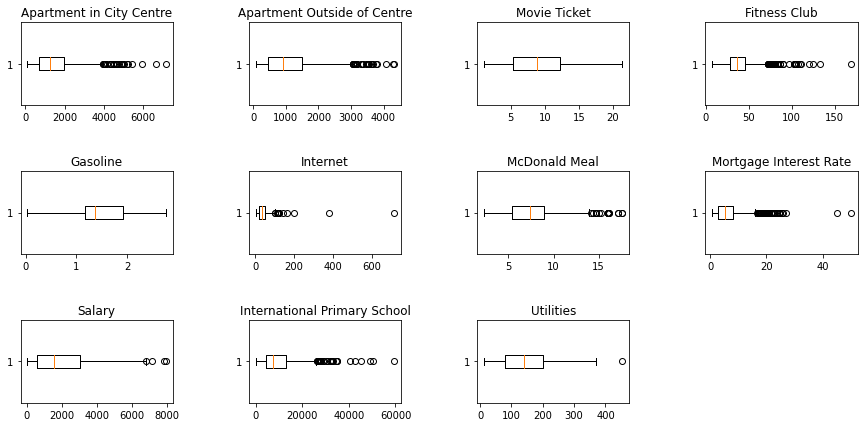

In [22]:
fig = plt.figure(figsize =(15, 7))
ax1 = fig.add_subplot(3, 4, 1)
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)
ax5 = fig.add_subplot(3, 4, 5)
ax6 = fig.add_subplot(3, 4, 6)
ax7 = fig.add_subplot(3, 4, 7)
ax8 = fig.add_subplot(3, 4, 8)
ax9 = fig.add_subplot(3, 4, 9)
ax10 = fig.add_subplot(3, 4, 10)
ax11 = fig.add_subplot(3, 4, 11)

ax1.boxplot(data_num['aprtmnt_city_centre'], vert = 0)
ax1.set_title('Apartment in City Centre')
ax2.boxplot(data_num['aprtmnt_out_centre'], vert = 0)
ax2.set_title('Apartment Outside of Centre')
ax3.boxplot(data_num['cinema'], vert = 0)
ax3.set_title('Movie Ticket')
ax4.boxplot(data_num['fitnessclub'], vert = 0)
ax4.set_title('Fitness Club')
ax5.boxplot(data_num['gasoline'], vert = 0)
ax5.set_title('Gasoline')
ax6.boxplot(data_num['internet'], vert = 0)
ax6.set_title('Internet')
ax7.boxplot(data_num['mcd_meal'], vert = 0)
ax7.set_title('McDonald Meal')
ax8.boxplot(data_num['mortgage_IR'], vert = 0)
ax8.set_title('Mortgage Interest Rate')
ax9.boxplot(data_num['salary'], vert = 0)
ax9.set_title('Salary')
ax10.boxplot(data_num['school'], vert = 0)
ax10.set_title('International Primary School')
ax11.boxplot(data_num['utilities'], vert = 0)
ax11.set_title('Utilities')

plt.subplots_adjust(wspace = 0.5, hspace = 0.8);

Since many of the variables have quite a number of outliers, median is a more robust statistic to make comparisons among  costs for different variables across countries. Median is not affected by outliers like mean is.

#### Descriptive Statistics by Country

In [23]:
# Maximum costs for each variable by country

data_max = data.groupby(['country']).max()
pd.set_option('display.max_rows', None)
data_max

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
country,,,,,,,,,,,
Afghanistan,228.81,146.89,2.54,13.56,0.89,715.63,3.11,13.88,195.86,1491.53,31.99
Albania,801.88,465.11,6.76,36.09,2.13,17.57,5.86,5.10,463.59,3410.46,92.68
Algeria,438.84,254.60,7.23,20.15,0.33,69.32,4.70,6.94,285.56,3211.46,71.43
Argentina,627.35,444.68,5.00,23.63,1.38,21.87,5.74,50.00,522.22,4891.47,57.63
Armenia,1590.98,951.12,6.32,72.20,1.32,19.41,6.32,12.20,526.47,6898.92,94.01
Australia,3362.87,2175.19,16.65,65.47,1.42,61.16,10.87,4.08,4728.33,19182.55,247.06
Austria,2042.51,1349.94,15.54,47.30,2.03,40.04,9.48,2.26,2735.42,14049.94,282.51
Azerbaijan,627.73,333.51,4.71,32.43,0.64,14.73,5.74,9.15,405.72,5035.64,50.18
Bahamas,2229.25,3055.56,15.50,103.50,1.65,92.61,8.00,6.75,1817.33,11767.50,261.63


In [24]:
# Minimum costs for each variable by country

data_min = data.groupby(['country']).min()
data_min

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
country,,,,,,,,,,,
Afghanistan,228.81,146.89,2.54,13.56,0.89,715.63,3.11,13.88,195.86,1491.53,31.99
Albania,289.17,217.06,4.21,25.92,1.53,13.02,3.15,4.00,350.17,1603.96,63.49
Algeria,265.21,182.03,5.06,17.57,0.31,27.77,4.34,6.56,269.43,1928.80,48.36
Argentina,367.56,332.50,5.00,16.75,0.97,20.84,5.00,45.00,403.51,2475.65,48.19
Armenia,1590.98,951.12,6.32,72.20,1.32,19.41,6.32,12.20,526.47,6898.92,94.01
Australia,1165.26,946.88,8.15,33.07,1.32,48.41,8.15,2.50,2812.70,3058.11,96.84
Austria,1269.76,1042.04,10.54,29.72,1.86,32.20,8.43,1.82,1965.30,6989.84,212.42
Azerbaijan,627.73,333.51,4.71,32.43,0.64,14.73,5.74,9.15,405.72,5035.64,50.18
Bahamas,2229.25,3055.56,15.50,103.50,1.65,92.61,8.00,6.75,1817.33,11767.50,261.63


The maximum and minimum costs for some countries are the same value since these countries only involve one of their cities in the dataset.

In [25]:
# Mean costs for each variable by country

data_mean = data.groupby(['country']).mean()
data_mean

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
country,,,,,,,,,,,
Afghanistan,228.810000,146.890000,2.540000,13.560000,0.890000,715.630000,3.110000,13.880000,195.860000,1491.530000,31.990000
Albania,514.516667,311.870000,5.880000,31.370000,1.766667,15.513333,4.506667,4.513333,398.933333,2546.170000,82.603333
Algeria,352.025000,218.315000,6.145000,18.860000,0.320000,48.545000,4.520000,6.750000,277.495000,2570.130000,59.895000
Argentina,497.455000,388.590000,5.000000,20.190000,1.175000,21.355000,5.370000,47.500000,462.865000,3683.560000,52.910000
Armenia,1590.980000,951.120000,6.320000,72.200000,1.320000,19.410000,6.320000,12.200000,526.470000,6898.920000,94.010000
Australia,2061.733571,1473.552143,12.885714,45.742143,1.357143,52.259286,9.329286,3.343571,3824.148571,10306.086429,161.005714
Austria,1567.950000,1190.406000,12.960000,36.062000,1.918000,35.936000,9.060000,2.054000,2341.920000,10510.160000,243.768000
Azerbaijan,627.730000,333.510000,4.710000,32.430000,0.640000,14.730000,5.740000,9.150000,405.720000,5035.640000,50.180000
Bahamas,2229.250000,3055.560000,15.500000,103.500000,1.650000,92.610000,8.000000,6.750000,1817.330000,11767.500000,261.630000


In [26]:
# Median costs for each variable by country

data_median = data.groupby(['country']).median()
data_median

,aprtmnt_city_centre,aprtmnt_out_centre,cinema,fitnessclub,gasoline,internet,mcd_meal,mortgage_IR,salary,school,utilities
country,,,,,,,,,,,
Afghanistan,228.810,146.890,2.540,13.560,0.890,715.630,3.110,13.880,195.860,1491.530,31.990
Albania,452.500,253.440,6.670,32.100,1.640,15.950,4.510,4.440,383.040,2624.090,91.640
Algeria,352.025,218.315,6.145,18.860,0.320,48.545,4.520,6.750,277.495,2570.130,59.895
Argentina,497.455,388.590,5.000,20.190,1.175,21.355,5.370,47.500,462.865,3683.560,52.910
Armenia,1590.980,951.120,6.320,72.200,1.320,19.410,6.320,12.200,526.470,6898.920,94.010
Australia,2088.010,1459.440,12.570,43.570,1.355,51.285,9.210,3.320,4067.945,9878.175,145.385
Austria,1527.930,1235.220,12.640,33.360,1.890,35.370,9.480,2.100,2324.490,10361.830,249.880
Azerbaijan,627.730,333.510,4.710,32.430,0.640,14.730,5.740,9.150,405.720,5035.640,50.180
Bahamas,2229.250,3055.560,15.500,103.500,1.650,92.610,8.000,6.750,1817.330,11767.500,261.630


#### Bar plot for Top 10 Countries with Highest Costs across Various Living Expenses and Salary

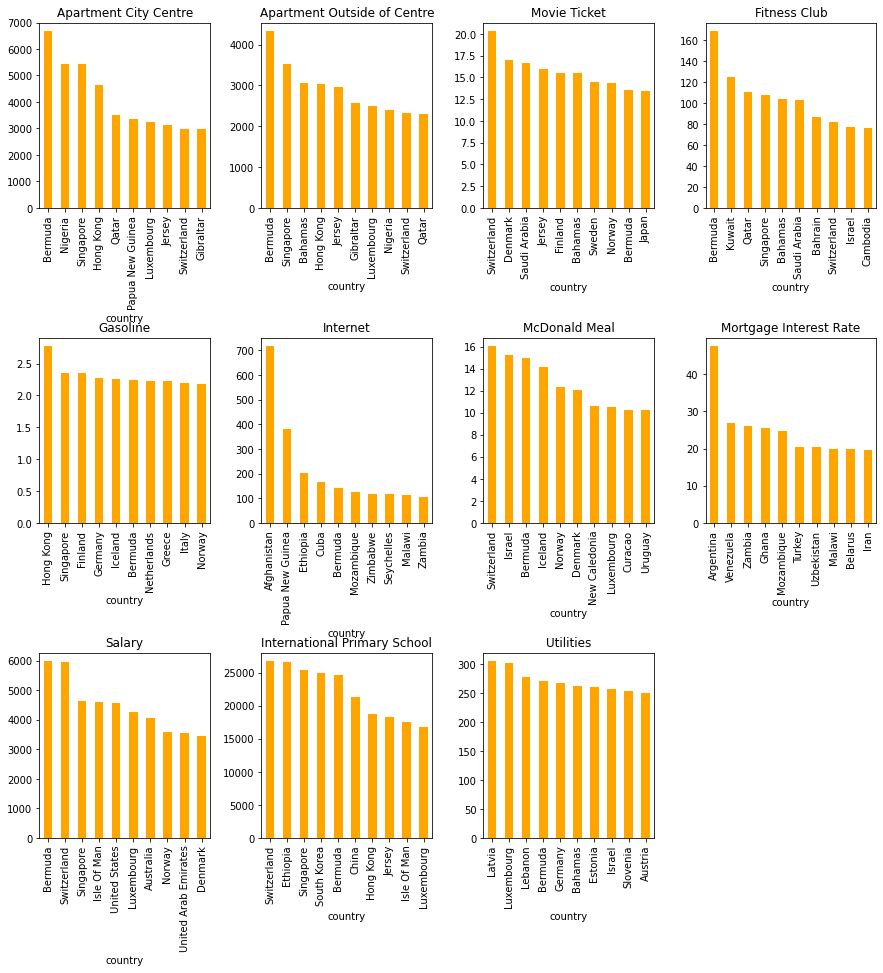

In [27]:
fig, axes = plt.subplots(3,4, figsize=(15, 15))

data_median['aprtmnt_city_centre'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[0,0], color = 'orange', title = 'Apartment City Centre')
data_median['aprtmnt_out_centre'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[0,1], color = 'orange', title = 'Apartment Outside of Centre')
data_median['cinema'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[0,2], color = 'orange', title = 'Movie Ticket') 
data_median['fitnessclub'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[0,3], color = 'orange', title = 'Fitness Club')
data_median['gasoline'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[1,0], color = 'orange', title = 'Gasoline')
data_median['internet'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[1,1], color = 'orange', title = 'Internet')
data_median['mcd_meal'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[1,2], color = 'orange', title = 'McDonald Meal')
data_median['mortgage_IR'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[1,3], color = 'orange', title = 'Mortgage Interest Rate')
data_median['salary'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[2,0], color = 'orange', title = 'Salary')
data_median['school'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[2,1], color = 'orange', title = 'International Primary School')
data_median['utilities'].sort_values(ascending = False)[0:10].plot.bar(ax = axes[2,2], color = 'orange', title = 'Utilities')

fig.delaxes(axes[2][3])
plt.subplots_adjust(wspace = 0.3, hspace = 0.7);

#### Additional Codes for Analysis

In [28]:
# to see the country with free education

data_min['school'].sort_values(ascending = True)

country
Finland                            0.00
India                            324.24
Sri Lanka                        425.77
Pakistan                         643.72
Sweden                           677.89
Somalia                          773.33
Iran                             790.25
Bhutan                           799.64
Libya                           1157.41
Bosnia And Herzegovina          1164.67
Tunisia                         1342.42
Jamaica                         1380.44
Guyana                          1388.44
Bangladesh                      1463.16
North Macedonia                 1485.67
Afghanistan                     1491.53
Ireland                         1580.62
Albania                         1603.96
Rwanda                          1640.66
Turkey                          1663.63
Morocco                         1674.99
Cameroon                        1675.27
Iraq                            1709.02
Bulgaria                        1709.82
Colombia                        

In [29]:
# to see the country with the highest mortgage interest rate

data_max['mortgage_IR'].sort_values(ascending = False)

country
Argentina                      50.00
Venezuela                      27.00
Zambia                         26.00
Ghana                          25.50
Mozambique                     24.75
Turkey                         24.67
Iran                           22.43
Mexico                         21.67
Uzbekistan                     20.40
Malawi                         20.00
Belarus                        20.00
Uganda                         19.68
Ukraine                        18.67
Nigeria                        17.67
Rwanda                         17.62
Madagascar                     17.50
Sudan                          17.00
Iraq                           17.00
Ethiopia                       16.54
Sri Lanka                      16.08
Seychelles                     16.00
Kyrgyzstan                     15.88
Tajikistan                     15.80
Libya                          15.50
Kazakhstan                     15.50
Peru                           15.00
Zimbabwe                      

In [30]:
# to see the country with the lowest utilities cost

data_median['utilities'].sort_values(ascending = True)

country
Venezuela                       12.370
Libya                           18.260
Syria                           18.480
Sri Lanka                       23.560
Nepal                           26.280
Egypt                           26.530
Ghana                           26.750
Kenya                           28.180
Nigeria                         29.895
Bolivia                         30.130
Bangladesh                      30.785
India                           31.010
Tajikistan                      31.260
Afghanistan                     31.990
Iran                            32.810
Bhutan                          34.040
Kyrgyzstan                      34.360
Tunisia                         34.850
Cuba                            37.140
Morocco                         41.220
Sudan                           41.590
Ecuador                         41.900
Uzbekistan                      42.750
Kuwait                          43.980
Madagascar                      44.900
Malaysia         

In [31]:
data_median['internet'].sort_values(ascending = True)

country
Ukraine                          4.885
Turkey                           8.120
Russia                           8.445
Romania                          8.865
Moldova                          9.020
India                            9.120
Sri Lanka                        9.610
Vietnam                         10.570
China                           11.250
Kazakhstan                      11.740
Nepal                           12.170
Hungary                         12.280
Bulgaria                        12.395
Mongolia                        12.530
Belarus                         12.670
Lithuania                       13.170
Poland                          13.210
Kyrgyzstan                      13.460
Egypt                           14.190
Azerbaijan                      14.730
Albania                         15.950
Thailand                        16.240
North Macedonia                 16.875
Kosovo (Disputed Territory)     17.690
Latvia                          17.790
Georgia          